In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Training Dataset

In [17]:
ds = load_dataset("rag-datasets/rag-mini-wikipedia", "text-corpus")
print(ds)

DatasetDict({
    passages: Dataset({
        features: ['passage', 'id'],
        num_rows: 3200
    })
})


In [18]:
for subset_name, subset in ds.items():
    print(f"Subset: {subset_name}")
    print(f"Number of examples: {len(subset)}")
    print(f"First example: {subset[0]}")
    print("\n")


Subset: passages
Number of examples: 3200
First example: {'passage': 'Uruguay (official full name in  ; pron.  , Eastern Republic of  Uruguay) is a country located in the southeastern part of South America.  It is home to 3.3 million people, of which 1.7 million live in the capital Montevideo and its metropolitan area.', 'id': 0}




In [19]:
# Convert to DataFrame for analysis
df_train = pd.DataFrame(subset)

# Basic dataset information
print("=== Training Dataset Basic Information ===")
print(f"Dataset name: rag-datasets/rag-mini-wikipedia (text-corpus)")
print(f"Dataset type: {type(ds)}")
print(f"Number of subsets: {len(ds)}")
print(f"Subset names: {list(ds.keys())}")

print(f"\n=== Training Dataset Details ===")
print(f"Subset: {subset_name}")
print(f"Number of examples: {len(subset)}")
print(f"Features: {subset.features}")
print(f"Data type: {type(subset)}")

# Display first few examples
print(f"\n=== Sample Training Examples ===")
for i in range(min(5, len(subset))):
    sample = subset[i]
    print(f"\nExample {i+1}:")
    print(f"  ID: {sample['id']}")
    print(f"  Passage: {sample['passage'][:200]}...")  # Show first 200 characters


=== Training Dataset Basic Information ===
Dataset name: rag-datasets/rag-mini-wikipedia (text-corpus)
Dataset type: <class 'datasets.dataset_dict.DatasetDict'>
Number of subsets: 1
Subset names: ['passages']

=== Training Dataset Details ===
Subset: passages
Number of examples: 3200
Features: {'passage': Value('string'), 'id': Value('int64')}
Data type: <class 'datasets.arrow_dataset.Dataset'>

=== Sample Training Examples ===

Example 1:
  ID: 0
  Passage: Uruguay (official full name in  ; pron.  , Eastern Republic of  Uruguay) is a country located in the southeastern part of South America.  It is home to 3.3 million people, of which 1.7 million live in...

Example 2:
  ID: 1
  Passage: It is bordered by Brazil to the north, by Argentina across the bank of both the Uruguay River to the west and the estuary of RÃ­o de la Plata to the southwest, and the South Atlantic Ocean to the sout...

Example 3:
  ID: 2
  Passage: Montevideo was founded by the Spanish in the early 18th century as 

In [20]:
# Training Dataset Quality Analysis
print("=== Training Dataset Quality Analysis ===")

# Basic statistics
print(f"\n1. Basic Statistics:")
print(f"   Total samples: {len(df_train)}")
print(f"   Number of columns: {len(df_train.columns)}")
print(f"   Column names: {list(df_train.columns)}")

# Missing values check
print(f"\n2. Missing Values Check:")
missing_values = df_train.isnull().sum()
print(f"   Missing values:")
for col in df_train.columns:
    print(f"     {col}: {missing_values[col]} ({missing_values[col]/len(df_train)*100:.2f}%)")

# Data types
print(f"\n3. Data Types:")
print(f"   {df_train.dtypes}")

# Duplicate values check
print(f"\n4. Duplicate Values Check:")
duplicates = df_train.duplicated().sum()
print(f"   Duplicate rows: {duplicates} ({duplicates/len(df_train)*100:.2f}%)")

# ID analysis
print(f"\n5. ID Analysis:")
print(f"   ID unique values: {df_train['id'].nunique()}")
print(f"   ID range: {df_train['id'].min()} - {df_train['id'].max()}")
print(f"   ID continuous: {df_train['id'].is_monotonic_increasing}")

# Passage length analysis
print(f"\n6. Passage Length Analysis:")
df_train['passage_length'] = df_train['passage'].str.len()
passage_length_stats = df_train['passage_length'].describe()
print(f"   Passage length statistics:")
print(f"   {passage_length_stats}")

print(f"\n   Passage length range: {df_train['passage_length'].min()}-{df_train['passage_length'].max()} characters")
print(f"   Average passage length: {df_train['passage_length'].mean():.2f} characters")


=== Training Dataset Quality Analysis ===

1. Basic Statistics:
   Total samples: 3200
   Number of columns: 2
   Column names: ['passage', 'id']

2. Missing Values Check:
   Missing values:
     passage: 0 (0.00%)
     id: 0 (0.00%)

3. Data Types:
   passage    object
id          int64
dtype: object

4. Duplicate Values Check:
   Duplicate rows: 0 (0.00%)

5. ID Analysis:
   ID unique values: 3200
   ID range: 0 - 3200
   ID continuous: True

6. Passage Length Analysis:
   Passage length statistics:
   count    3200.000000
mean      389.848125
std       348.368869
min         1.000000
25%       108.000000
50%       299.000000
75%       574.000000
max      2515.000000
Name: passage_length, dtype: float64

   Passage length range: 1-2515 characters
   Average passage length: 389.85 characters


=== Training Dataset Visualization ===


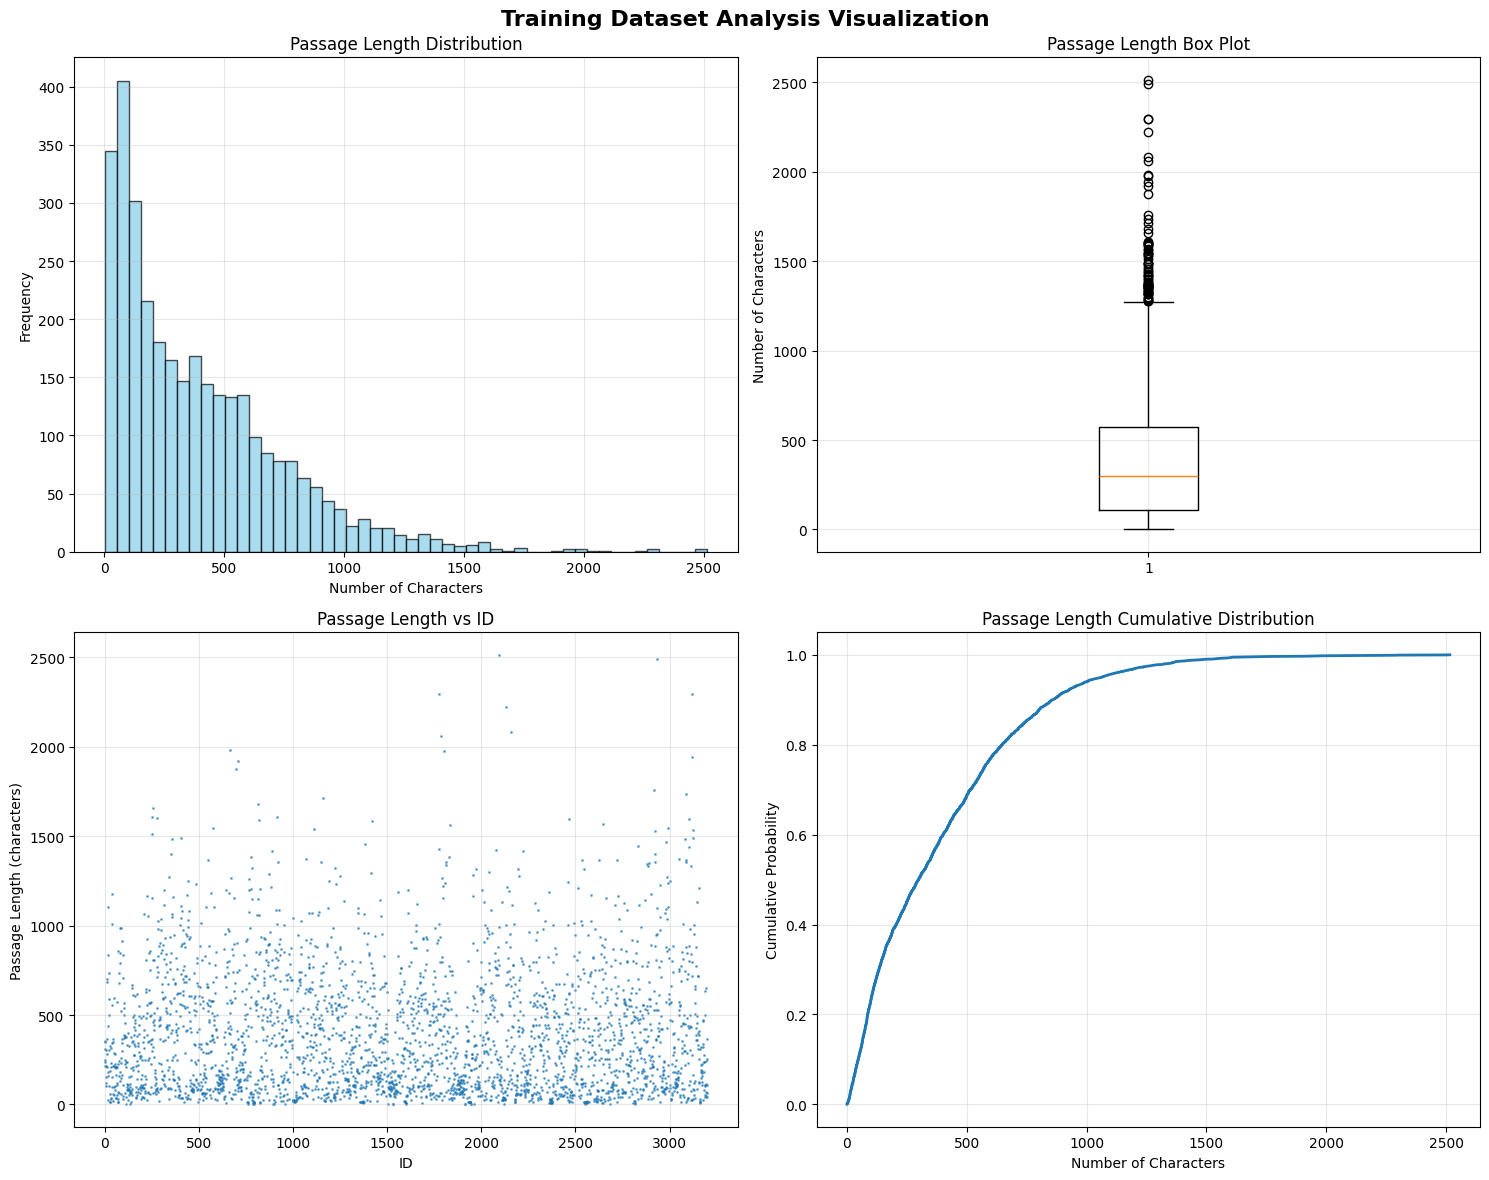


=== Training Dataset Quality Summary ===
✓ Dataset completeness: No missing values
✓ Data uniqueness: No duplicate rows
✓ ID continuity: Yes
✓ Passage length range: 1-2515 characters
✓ Average passage length: 389.85 characters
✓ Dataset size: 3200 passages
✓ Memory usage: 1.72 MB


In [21]:
# Training Dataset Visualization
print("=== Training Dataset Visualization ===")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Training Dataset Analysis Visualization', fontsize=16, fontweight='bold')

# 1. Passage Length Distribution
axes[0, 0].hist(df_train['passage_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Passage Length Distribution')
axes[0, 0].set_xlabel('Number of Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Passage Length Box Plot
axes[0, 1].boxplot(df_train['passage_length'], vert=True)
axes[0, 1].set_title('Passage Length Box Plot')
axes[0, 1].set_ylabel('Number of Characters')
axes[0, 1].grid(True, alpha=0.3)

# 3. ID vs Passage Length
axes[1, 0].scatter(df_train['id'], df_train['passage_length'], alpha=0.6, s=1)
axes[1, 0].set_title('Passage Length vs ID')
axes[1, 0].set_xlabel('ID')
axes[1, 0].set_ylabel('Passage Length (characters)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Passage Length Cumulative Distribution
import numpy as np
sorted_lengths = np.sort(df_train['passage_length'])
cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
axes[1, 1].plot(sorted_lengths, cumulative, linewidth=2)
axes[1, 1].set_title('Passage Length Cumulative Distribution')
axes[1, 1].set_xlabel('Number of Characters')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Data Quality Summary
print(f"\n=== Training Dataset Quality Summary ===")
print(f"✓ Dataset completeness: No missing values")
print(f"✓ Data uniqueness: No duplicate rows")
print(f"✓ ID continuity: {'Yes' if df_train['id'].is_monotonic_increasing else 'No'}")
print(f"✓ Passage length range: {df_train['passage_length'].min()}-{df_train['passage_length'].max()} characters")
print(f"✓ Average passage length: {df_train['passage_length'].mean():.2f} characters")
print(f"✓ Dataset size: {len(df_train)} passages")
print(f"✓ Memory usage: {df_train.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")


In [22]:
df_train.to_csv("../data/training-rag-mini-wikipedia_question-answer.csv")

# Test Dataset

In [23]:
ds = load_dataset("rag-datasets/rag-mini-wikipedia", "question-answer")
print(ds)

DatasetDict({
    test: Dataset({
        features: ['question', 'answer', 'id'],
        num_rows: 918
    })
})


In [24]:
for subset_name, subset in ds.items():
    print(f"Subset: {subset_name}")
    print(f"Number of examples: {len(subset)}")
    print(f"First example: {subset[0]}")
    print("\n")


Subset: test
Number of examples: 918
First example: {'question': 'Was Abraham Lincoln the sixteenth President of the United States?', 'answer': 'yes', 'id': 0}




In [25]:
subset_name, subset = next(iter(ds.items()))

df = pd.DataFrame(subset)

In [26]:
df.head()

,question,answer,id
0,Was Abraham Lincoln the sixteenth President of...,yes,0
1,Did Lincoln sign the National Banking Act of 1...,yes,2
2,Did his mother die of pneumonia?,no,4
3,How many long was Lincoln's formal education?,18 months,6
4,When did Lincoln begin his political career?,1832,8


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  918 non-null    object
 1   answer    918 non-null    object
 2   id        918 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.6+ KB


In [28]:
df.describe()

,id
count,918.00000
mean,923.61329
std,484.11148
min,0.00000
25%,503.50000
50%,956.00000
75%,1334.50000
max,1714.00000


In [29]:
# test if there are missing values
df.isnull().sum()

question    0
answer      0
id          0
dtype: int64

In [30]:
# test if there are duplicated rows
df.duplicated().sum()

np.int64(0)

In [31]:
# test if the id is unique
df["id"].nunique() == len(df)

True

In [32]:
print(f"   ID range: {df['id'].min()} - {df['id'].max()}")
print(f"   ID continuous: {df['id'].is_monotonic_increasing}")

   ID range: 0 - 1714
   ID continuous: True


=== Question Uniqueness Analysis ===
Unique questions: 918
Total questions: 918
Duplicate questions: 0
Duplication rate: 0.00%

Question Length Statistics:
count    918.000000
mean      53.090414
std       28.482015
min        4.000000
25%       36.000000
50%       47.000000
75%       61.000000
max      252.000000
Name: question, dtype: float64


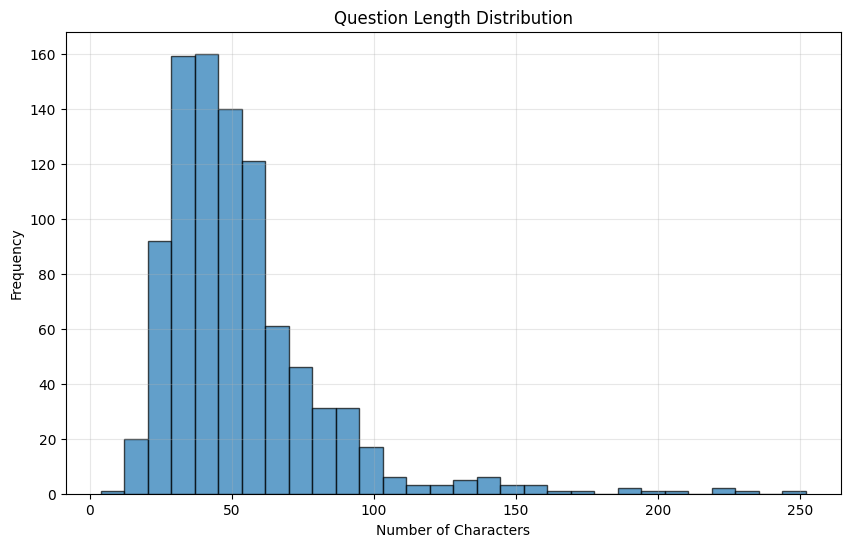


Duplicate Questions Analysis:
Number of questions with duplicates: 0
     ✓ All questions are unique

=== Answer Distribution Analysis ===
Number of answer categories: 499
Answer distribution:
     'yes': 160 (17.43%)
     'Yes': 133 (14.49%)
     'Yes.': 39 (4.25%)
     'no': 34 (3.70%)
     'No': 25 (2.72%)
     'No.': 16 (1.74%)
     'Grant': 3 (0.33%)
     'John Adams': 3 (0.33%)
     '75 years': 2 (0.22%)
     'Japan': 2 (0.22%)
     'loons or divers, grebes, gallinules, and coots': 2 (0.22%)
     'millard fillmore': 2 (0.22%)
     'His father': 2 (0.22%)
     'Grover Cleveland': 2 (0.22%)
     'Amedeo Avogadro': 2 (0.22%)
     'Anders Celsius': 2 (0.22%)
     '1846': 2 (0.22%)
     'Pleurodira': 2 (0.22%)
     'hopping': 2 (0.22%)
     '1776': 2 (0.22%)
     'roo bars': 2 (0.22%)
     'The Federalist Party': 2 (0.22%)
     'Poaching, habitat loss, and toxins in gold mining.  ': 1 (0.11%)
     'Otters': 1 (0.11%)
     'The time of year associated with this is also associated with

In [33]:
# Question Uniqueness Analysis
print("=== Question Uniqueness Analysis ===")
unique_questions = df['question'].nunique()
total_questions = len(df)
print(f"Unique questions: {unique_questions}")
print(f"Total questions: {total_questions}")
print(f"Duplicate questions: {total_questions - unique_questions}")
print(f"Duplication rate: {(total_questions - unique_questions)/total_questions*100:.2f}%")

# Question Length Statistics
print(f"\nQuestion Length Statistics:")
question_length_stats = df['question'].apply(len).describe()
print(question_length_stats)

# Question Length Distribution Histogram
plt.figure(figsize=(10, 6))
df['question'].apply(len).hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Question Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Duplicate Questions Analysis
print(f"\nDuplicate Questions Analysis:")
duplicate_questions = df['question'].value_counts()
duplicate_questions = duplicate_questions[duplicate_questions > 1]
print(f"Number of questions with duplicates: {len(duplicate_questions)}")

if len(duplicate_questions) > 0:
    print(f"\nMost frequently duplicated questions:")
    for question, count in duplicate_questions.head(10).items():
        print(f"     '{question}': {count} ({count/len(df)*100:.2f}%)")
else:
    print("     ✓ All questions are unique")

# Answer Distribution Analysis
print(f"\n=== Answer Distribution Analysis ===")
answer_counts = df['answer'].value_counts()
print(f"Number of answer categories: {len(answer_counts)}")
print(f"Answer distribution:")
for answer, count in answer_counts.items():
    print(f"     '{answer}': {count} ({count/len(df)*100:.2f}%)")

<Figure size 1200x800 with 0 Axes>

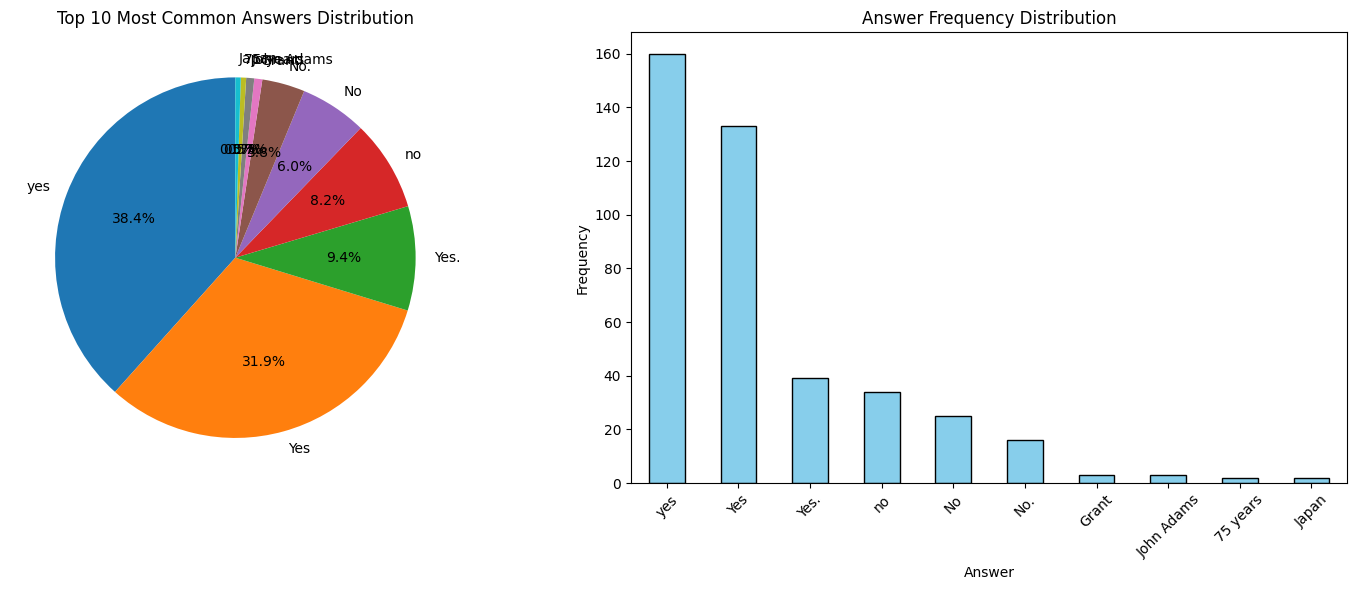


=== Answer Length Analysis ===
Answer length statistics:
count    918.000000
mean      19.183007
std       34.959257
min        1.000000
25%        3.000000
50%        5.000000
75%       21.000000
max      423.000000
Name: answer_length, dtype: float64


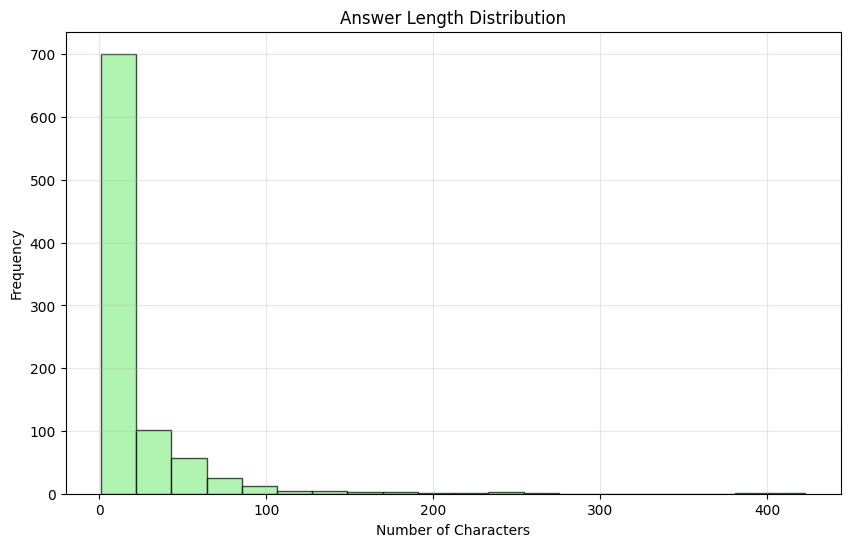


=== Data Quality Summary ===
✓ Dataset completeness: No missing values
✓ Data uniqueness: No duplicate rows
✓ Question uniqueness: 918/918 (100.00%)
✓ Answer diversity: 499 different answers
✓ Question length range: 4-252 characters
✓ Answer length range: 1-423 characters


In [34]:
# Answer Distribution Visualization
plt.figure(figsize=(12, 8))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Answer Distribution Pie Chart
top_answers = answer_counts.head(10)  # Show top 10 most common answers
ax1.pie(top_answers.values, labels=top_answers.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Top 10 Most Common Answers Distribution')

# Answer Distribution Bar Chart
top_answers.plot(kind='bar', ax=ax2, color='skyblue', edgecolor='black')
ax2.set_title('Answer Frequency Distribution')
ax2.set_xlabel('Answer')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Answer Length Analysis
print(f"\n=== Answer Length Analysis ===")
df['answer_length'] = df['answer'].apply(len)
answer_length_stats = df['answer_length'].describe()
print(f"Answer length statistics:")
print(answer_length_stats)

# Answer Length Distribution
plt.figure(figsize=(10, 6))
df['answer_length'].hist(bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Answer Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Data Quality Summary
print(f"\n=== Data Quality Summary ===")
print(f"✓ Dataset completeness: No missing values")
print(f"✓ Data uniqueness: No duplicate rows")
print(f"✓ Question uniqueness: {unique_questions}/{total_questions} ({unique_questions/total_questions*100:.2f}%)")
print(f"✓ Answer diversity: {len(answer_counts)} different answers")
print(f"✓ Question length range: {df['question'].apply(len).min()}-{df['question'].apply(len).max()} characters")
print(f"✓ Answer length range: {df['answer_length'].min()}-{df['answer_length'].max()} characters")

In [35]:
df.to_csv("../data/test-rag-mini-wikipedia_question-answer.csv")